# IN THIS NOTEBOOK WE GONNA BUILD A NEURAL NETWORK ON MNIST DATA SET

In [1]:
# FIRST OF ALL, LET'S IMPORT THE REQUIRED LIBRAIRIES
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

In [2]:
# Let's download the MNIST dataset
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [5]:
from torchvision import datasets, transforms

# Let's normalize the data using by defining a transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5, )),])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [8]:
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# print(type(images))
# print(images.shape)
# print(labels.shape)

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


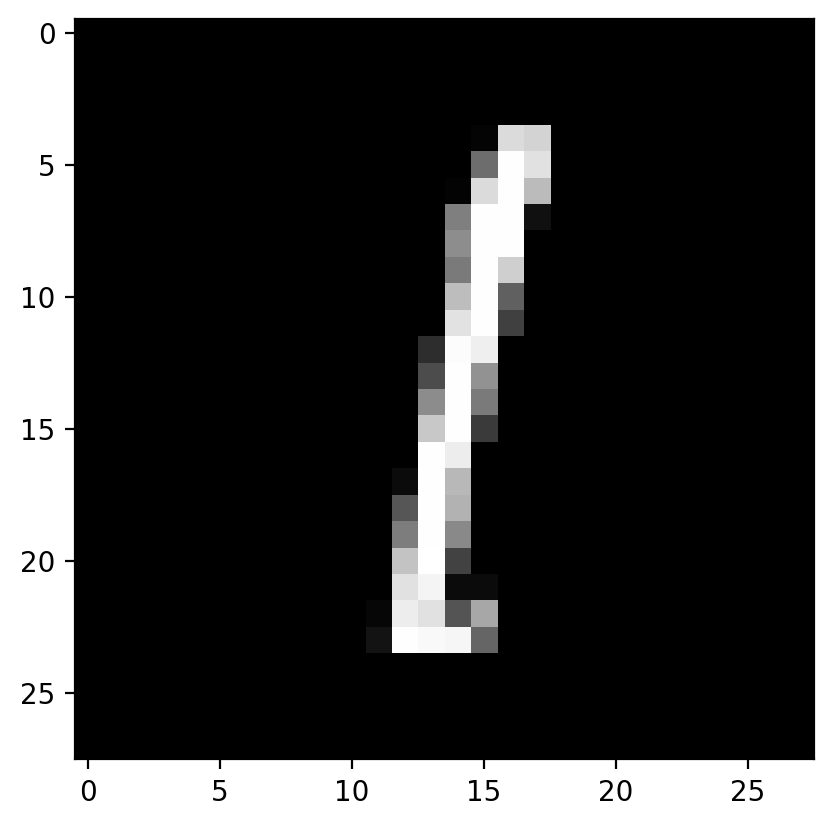

In [10]:
# Let's plot some images
plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r")

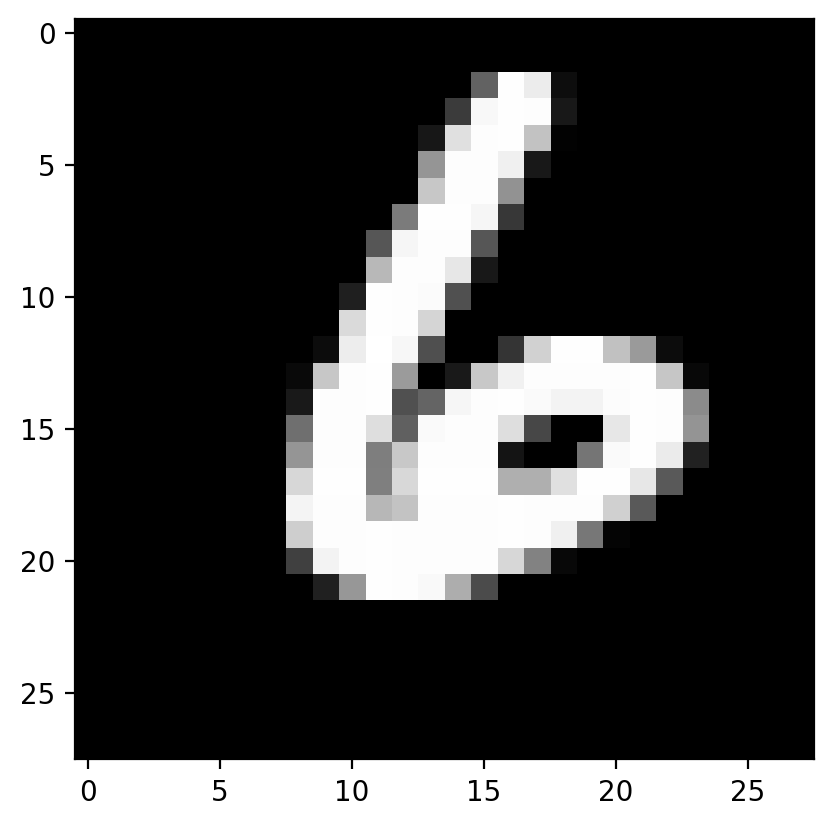

In [11]:
plt.imshow(images[3].numpy().squeeze(), cmap="Greys_r")

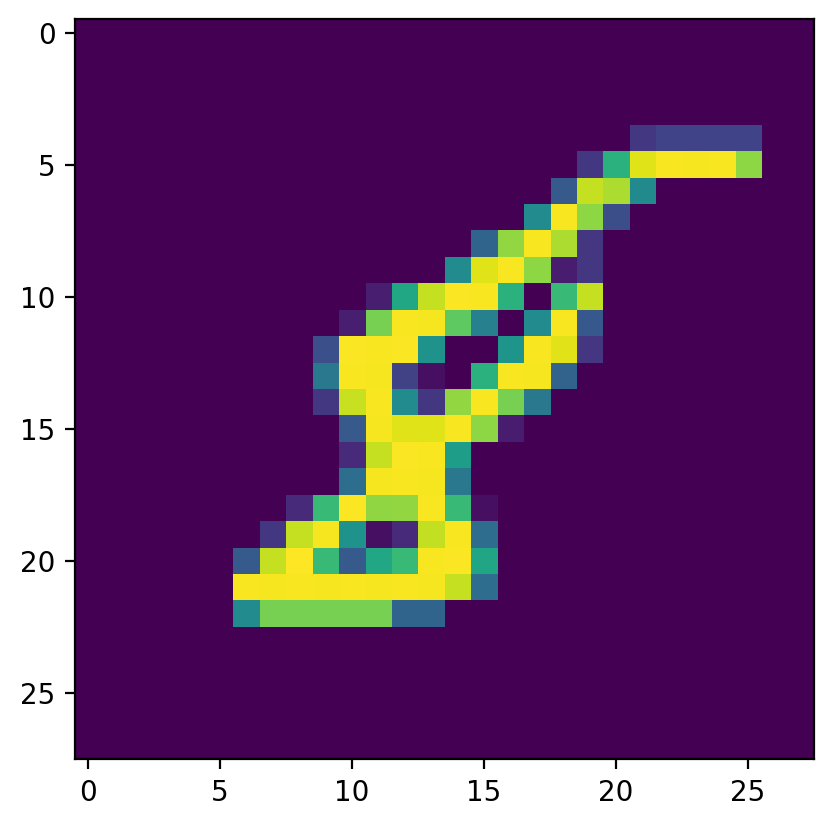

In [13]:
plt.imshow(images[5].numpy().squeeze(), cmap="viridis")

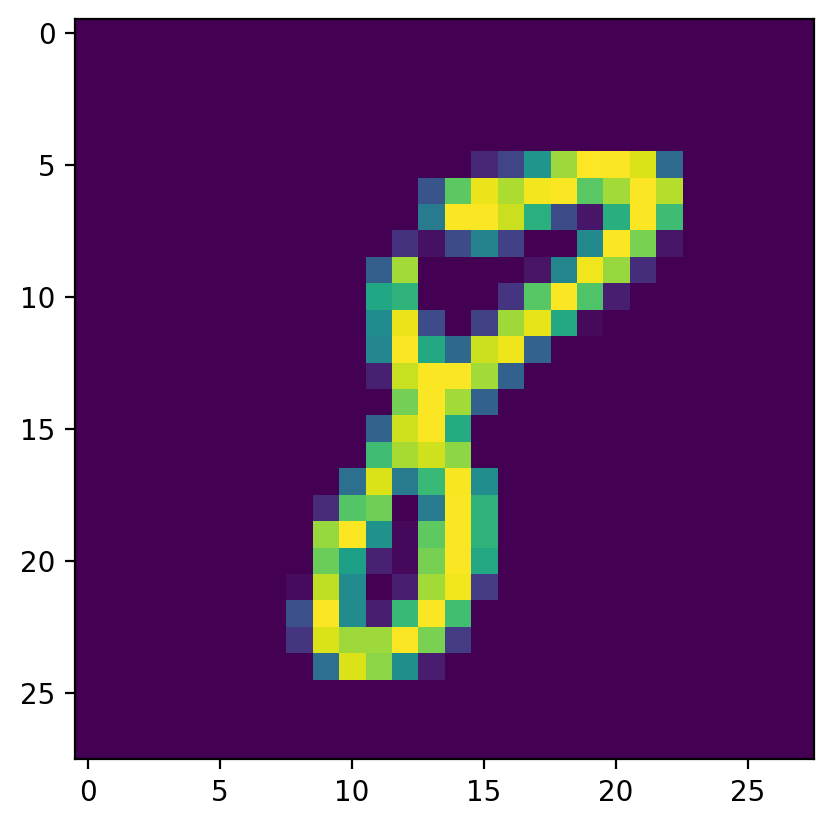

In [14]:
plt.imshow(images[0].numpy().squeeze())

In [15]:
images.shape


torch.Size([64, 1, 28, 28])

In [18]:
# Building activation function
def activation(x):
    
    
    return 1/(1+torch.exp(-x))

# Let's flatten the input images
inputs = images.view(images.shape[0], -1)

# Creating the parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

t = activation(torch.mm(inputs, w1) + b1)
output = activation(torch.mm(t, w2) + b2)
output[:10]

tensor([[2.6472e-09, 8.7518e-06, 4.1633e-10, 2.0405e-01, 1.5591e-07, 1.0000e+00,
         7.7721e-06, 2.2730e-05, 9.9987e-01, 1.8106e-04],
        [5.2136e-10, 7.1093e-04, 1.0667e-10, 9.9847e-01, 2.5449e-01, 1.0000e+00,
         6.7594e-06, 2.5412e-05, 1.0000e+00, 6.3229e-05],
        [8.9167e-13, 4.5984e-08, 2.1302e-09, 1.9673e-04, 2.1721e-05, 1.0000e+00,
         9.6872e-01, 2.7476e-04, 9.9932e-01, 3.5648e-01],
        [8.2179e-07, 1.9680e-07, 4.5339e-06, 2.5155e-02, 5.6881e-05, 1.0000e+00,
         7.1308e-07, 2.6326e-08, 9.9996e-01, 3.9185e-06],
        [4.9975e-12, 1.7394e-05, 1.7478e-09, 9.8846e-01, 4.5483e-03, 1.0000e+00,
         9.8650e-01, 1.5663e-04, 1.0000e+00, 1.8967e-05],
        [1.9253e-08, 8.3002e-06, 4.2340e-09, 7.8920e-03, 7.5443e-01, 1.0000e+00,
         3.1022e-02, 1.9963e-05, 1.0000e+00, 1.1024e-04],
        [1.0821e-09, 3.1228e-04, 1.2431e-08, 9.3990e-01, 8.4766e-04, 1.0000e+00,
         2.9421e-07, 1.0200e-08, 9.8480e-01, 1.4193e-05],
        [3.5859e-11, 3.7187

In [23]:
# Let's implementing a softmax function hat performs the softmax calculation 
# and returns probability distributions for each example in the batch.
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(output)
print(probabilities.shape)


torch.Size([64, 10])


In [24]:
print(probabilities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# BUILDING A FULLY CONNECTED NETWORK

In [25]:
# Import required module
from torch import nn


In [26]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Inputs units to hidden layer using linear transformation
        self.hidden = nn.Linear(784, 256)
        #Output layer
        self.output = nn.Linear(256, 10)
        
        #Sigmoid activation and softmax result(output)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim= 1)
        
    def forward(self, x):
        #We should pass the input tensor to each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x 

In [27]:
# Creating a new network object

model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

# Let's redefined the network using torch.nn.functional module

In [30]:
# Import torch.nn.functional module first

import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Inputs units to hidden layer using linear transformation
        self.hidden = nn.Linear(784, 256)
        #Output layer
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        #Defining hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        #Defining output layer with softmax activation
        x = F.softmax(self.output(x), dim = 1)
        
        return x
        
        

# Let's crete a new network

In [31]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Let'sdefine the layer 784, 128, 64 and the output 10
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        #This is the outpout layer 
        self.hidden3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.hidden3(x)
        x = F.softmax(x, dim = 1)
        
        
        return x
        
        

In [32]:
newModel = Network()
newModel

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (hidden3): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:
# Let's play with the weights and bias

In [34]:
print(newModel.hidden1.weight)

Parameter containing:
tensor([[ 0.0330,  0.0169,  0.0284,  ...,  0.0231,  0.0145, -0.0071],
        [ 0.0150, -0.0017,  0.0352,  ..., -0.0132,  0.0178, -0.0295],
        [ 0.0062, -0.0011,  0.0336,  ..., -0.0048,  0.0075, -0.0202],
        ...,
        [ 0.0308,  0.0028,  0.0298,  ...,  0.0103,  0.0205,  0.0148],
        [ 0.0180, -0.0083,  0.0121,  ...,  0.0047,  0.0017, -0.0349],
        [-0.0132,  0.0268,  0.0195,  ..., -0.0049,  0.0090,  0.0355]],
       requires_grad=True)


In [35]:
print(newModel.hidden1.bias)

Parameter containing:
tensor([-0.0281,  0.0111,  0.0178, -0.0016, -0.0335,  0.0337,  0.0115,  0.0140,
         0.0107,  0.0029,  0.0134, -0.0327,  0.0007,  0.0136, -0.0213, -0.0235,
        -0.0139,  0.0100,  0.0270,  0.0253, -0.0280, -0.0231, -0.0200,  0.0022,
        -0.0281, -0.0123, -0.0235, -0.0143,  0.0196, -0.0112,  0.0167, -0.0034,
         0.0077,  0.0154, -0.0067,  0.0299, -0.0241,  0.0185, -0.0211,  0.0061,
         0.0102, -0.0046,  0.0071,  0.0199, -0.0045,  0.0085,  0.0035, -0.0214,
         0.0172,  0.0002, -0.0056,  0.0147, -0.0008,  0.0023,  0.0065, -0.0136,
         0.0006, -0.0103,  0.0007, -0.0351,  0.0137, -0.0055,  0.0135,  0.0010,
        -0.0294, -0.0275,  0.0135, -0.0303,  0.0073,  0.0142, -0.0007,  0.0144,
        -0.0174,  0.0198,  0.0169,  0.0060,  0.0253,  0.0340, -0.0188,  0.0030,
        -0.0212, -0.0256, -0.0310, -0.0020,  0.0305,  0.0068, -0.0024, -0.0087,
        -0.0181,  0.0090, -0.0088, -0.0035, -0.0025,  0.0154,  0.0134,  0.0270,
         0.0234, -

In [36]:
print(newModel.hidden2.weight)

Parameter containing:
tensor([[ 0.0687, -0.0148,  0.0452,  ..., -0.0527,  0.0508, -0.0474],
        [-0.0841,  0.0317,  0.0528,  ..., -0.0634,  0.0847,  0.0822],
        [ 0.0655,  0.0625,  0.0270,  ..., -0.0607,  0.0054,  0.0525],
        ...,
        [-0.0863,  0.0377, -0.0203,  ...,  0.0654,  0.0502,  0.0519],
        [ 0.0578, -0.0144,  0.0257,  ..., -0.0112, -0.0442,  0.0223],
        [-0.0682,  0.0764,  0.0346,  ...,  0.0711,  0.0258, -0.0228]],
       requires_grad=True)


In [37]:
print(newModel.hidden2.bias)

Parameter containing:
tensor([ 0.0730,  0.0089,  0.0144,  0.0386,  0.0321, -0.0057,  0.0158, -0.0168,
         0.0345,  0.0879, -0.0276, -0.0392,  0.0020,  0.0655, -0.0789, -0.0188,
         0.0529, -0.0639, -0.0813,  0.0347, -0.0513,  0.0712,  0.0801, -0.0276,
         0.0732, -0.0582,  0.0740, -0.0615, -0.0686, -0.0479,  0.0184, -0.0495,
         0.0636, -0.0787, -0.0211, -0.0235, -0.0677, -0.0606, -0.0066,  0.0485,
        -0.0320, -0.0811, -0.0846,  0.0099, -0.0854, -0.0735,  0.0811,  0.0574,
        -0.0390,  0.0006, -0.0829, -0.0011, -0.0356, -0.0474, -0.0420, -0.0478,
         0.0311,  0.0680, -0.0519,  0.0823,  0.0521, -0.0548, -0.0852,  0.0503],
       requires_grad=True)


In [38]:
# Setting bias to zero

In [39]:
newModel.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

# Defining a forward pass

In [42]:
pip install jupyter-helpers

In [47]:
# Let's create a function to view the images

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

In [45]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

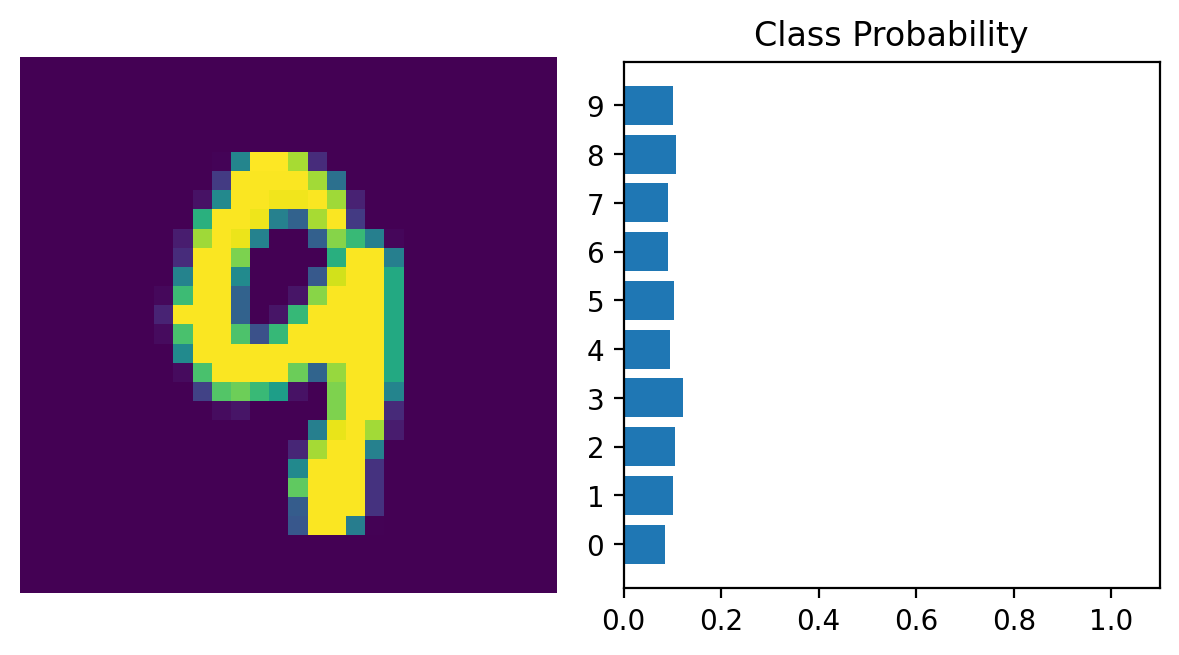

In [46]:
# Takibg some data
dataiter = iter(trainloader)
images, label = next(dataiter)
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# Forward pass through the network
img_idx = 0
ps =newModel.forward(images[img_idx, :])
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)


In [48]:
# Our network has basically no idea what this digit is.
# It's because we haven't trained it yet, all the weights are random!

In [49]:
# Let's build a new network architecture to train the model using the nn.sequential module

In [51]:
# Let's define the hyperparameters of our network

input_size = 784
hidden_size = [128, 64]
output_size = 10
# Let's build a feedforward network

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.Softmax(dim=1)
                     )

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


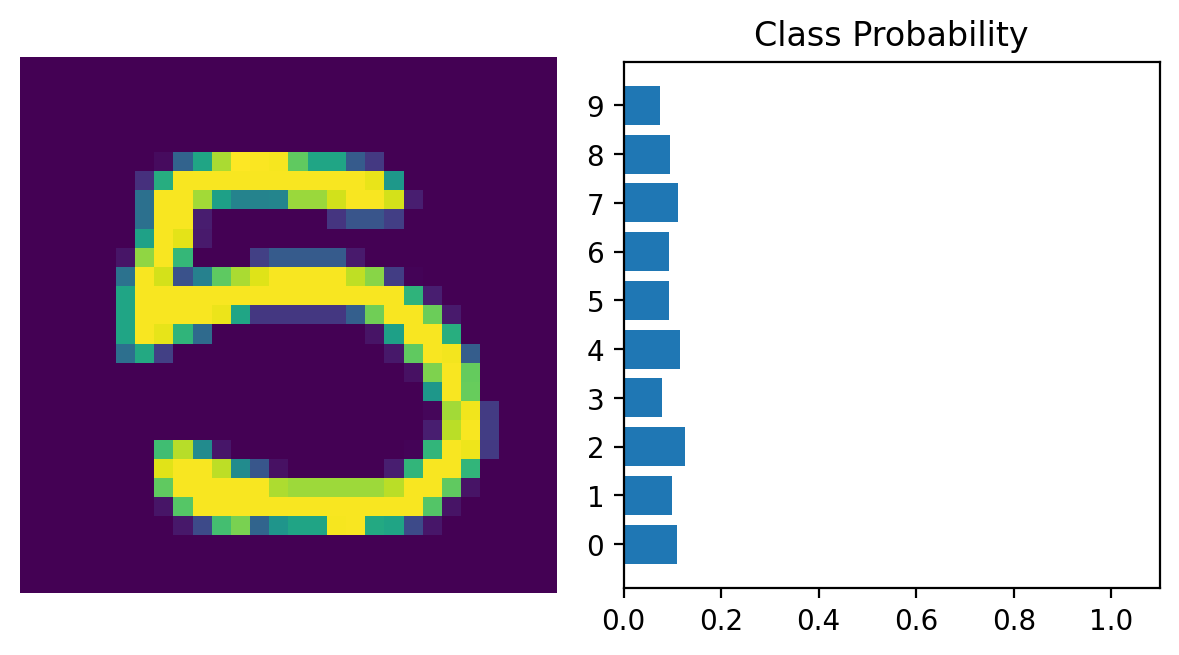

In [53]:
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [54]:
# Other way of building the network

In [55]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [56]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [57]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)

In [58]:
model.fc2

Linear(in_features=128, out_features=64, bias=True)

In [59]:
model.output

Linear(in_features=64, out_features=10, bias=True)

In [60]:
model.softmax

Softmax(dim=1)